In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

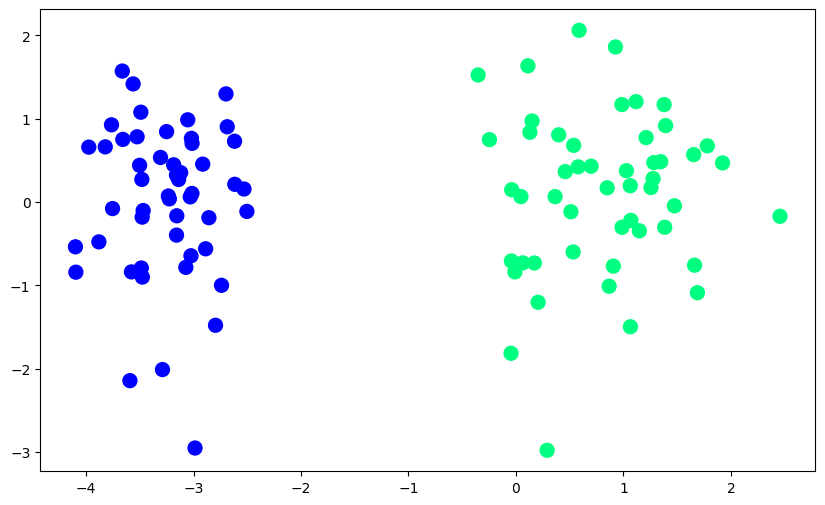

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [3]:
from sklearn.linear_model import LogisticRegression
log_reg =LogisticRegression(penalty='none',solver='sag')
log_reg.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [5]:
log_reg.coef_

array([[4.83374651, 0.21424455]])

In [6]:
log_reg.intercept_

array([5.80908957])

In [9]:
m1 = -(log_reg.coef_[0][0]/log_reg.coef_[0][1])
b1 = -(log_reg.intercept_/log_reg.coef_[0][1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [33]:
def gradient_descent(X,y):

  X= np.insert(X,0,1,axis=1)
  weights =np.ones(X.shape[1]) #initialise the wt matrix with ones for the dim=> columns
  lr =0.5 # this learning rate matches the op for the sklearn model

  for i in range(5000):
    y_pred =sigmoid(np.dot(X,weights))
    weights = weights + lr* ( np.dot(( y-y_pred ), X) / X.shape[0] )

  return weights[1:],weights[0]  #returns the weight coefficients and bias

In [34]:
def sigmoid(a):
  return 1/(1+np.exp(-a))

In [37]:
coef_,intercept_ = gradient_descent(X,y)
print(coef_,intercept_)

[4.68427642 0.19840332] 5.610965832527828


In [38]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [39]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

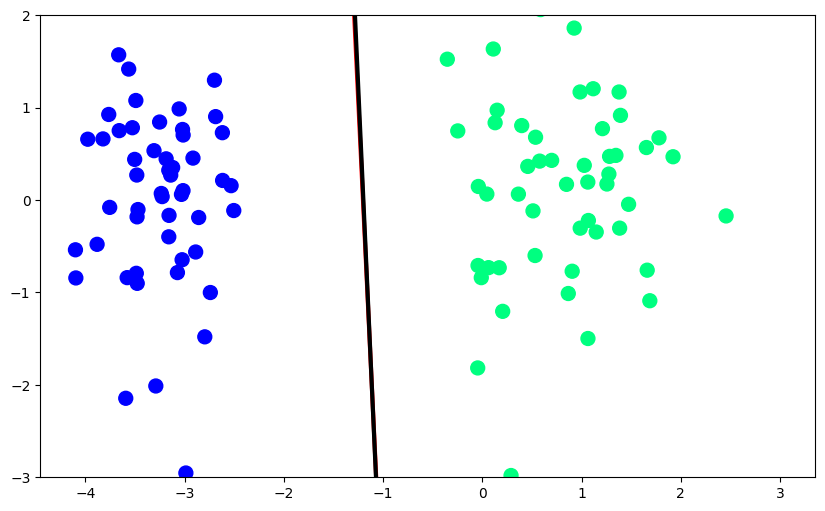

In [45]:
# visualising the results of both the models

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)